# TP 4 - Introducción al aprendizaje automatizado
### Juan Ignacio Farizano

--------------------------------------------------------------------------------

In [2]:
# Imports iniciales
%matplotlib inline
from common import *
from sklearn.tree import DecisionTreeClassifier
from neighbors import *

--------------------------------------------------------------------------------
## Ejercicio 1

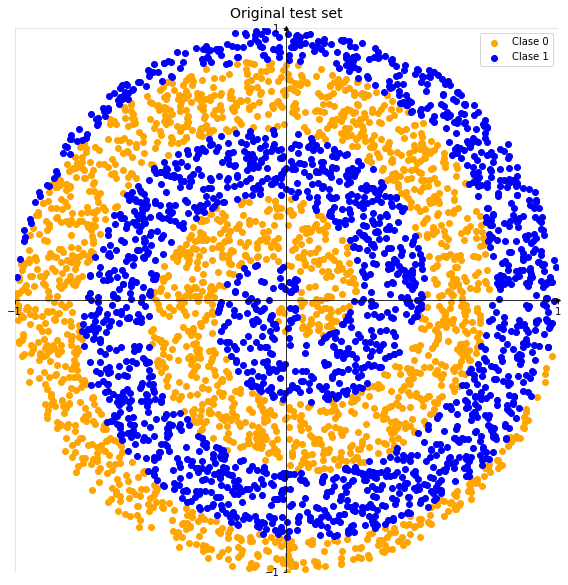

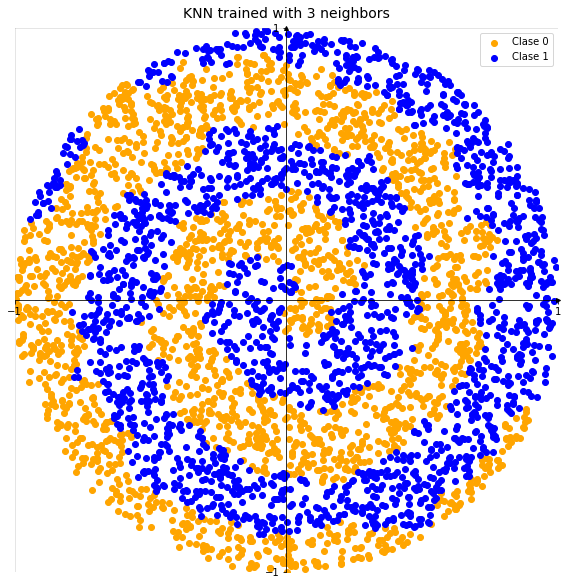

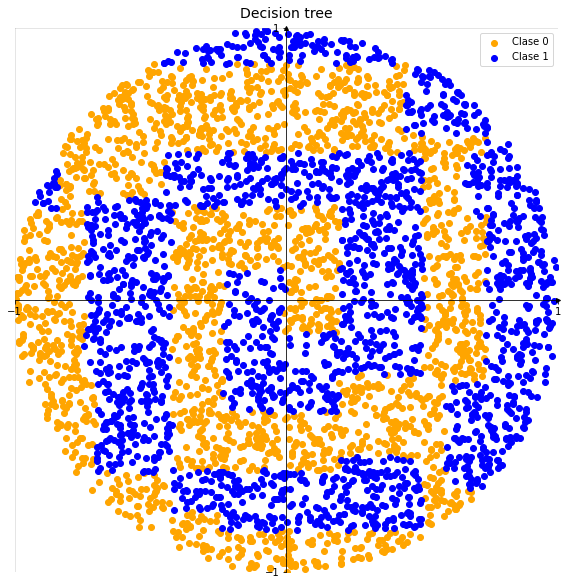

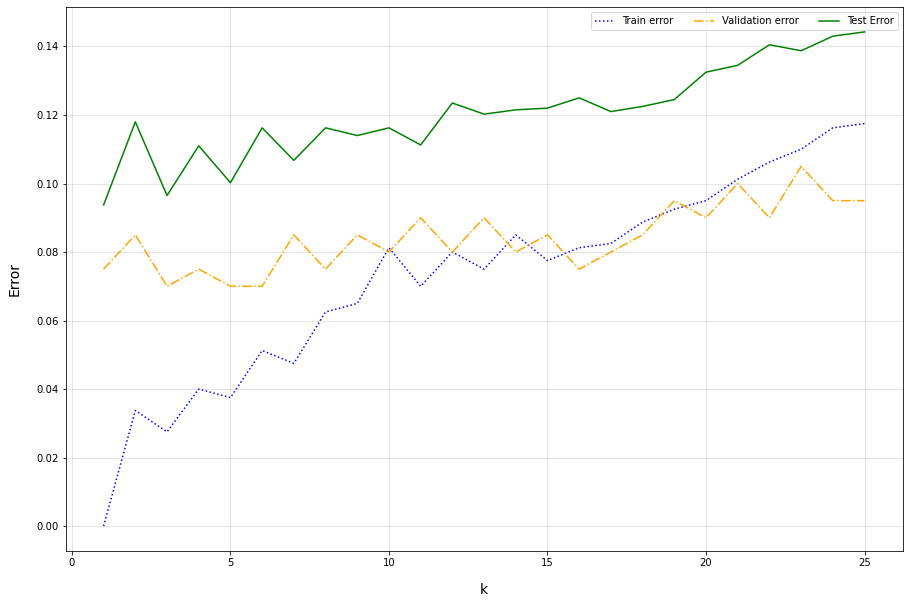

In [15]:
# Primero sin ruido
col_names = [0, 1, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_spirals = pd.read_csv("datasets/espirales_con_ruido/c_0.data", header=None, names = col_names)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_spirals[x_col_names], df_data_spirals[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

# Leo el conjunto de test
df_test_spirals = pd.read_csv("datasets/espirales_con_ruido/c_0.test", header=None, names = col_names)
X_test, y_test = df_test_spirals[x_col_names], df_test_spirals[y_col_name]

k_values = range(1, 26)
best_knn, best_k, error_train, error_val, error_test = train_kneigh_classif(k_values, X_train, y_train, X_val, y_val, X_test, y_test)  

errors = []

for i in range(25):
  errors.append([error_train[i], i + 1, "Train error"])
  errors.append([error_val[i], i + 1, "Validation error"])
  errors.append([error_test[i], i + 1, "Test Error"])

knn_predict = best_knn.predict(X_test)

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

frame = {0 : X_test[0], 1 : X_test[1], 'Class' : knn_predict}
df_predict_knn = pd.DataFrame(frame, columns=[0, 1, 'Class'])
frame = {0 : X_test[0], 1 : X_test[1], 'Class' : clf_predict}
df_predict_clf = pd.DataFrame(frame, columns=[0, 1, 'Class'])

graph_df(df_test_spirals, title="Original test set")
graph_df(df_predict_knn, title=f"KNN trained with {best_k} neighbors")
graph_df(df_predict_clf, title="Decision tree")

errors_df = pd.DataFrame(errors, columns = ["Error", "k", "Class"])
graph_errors(errors_df, "k")

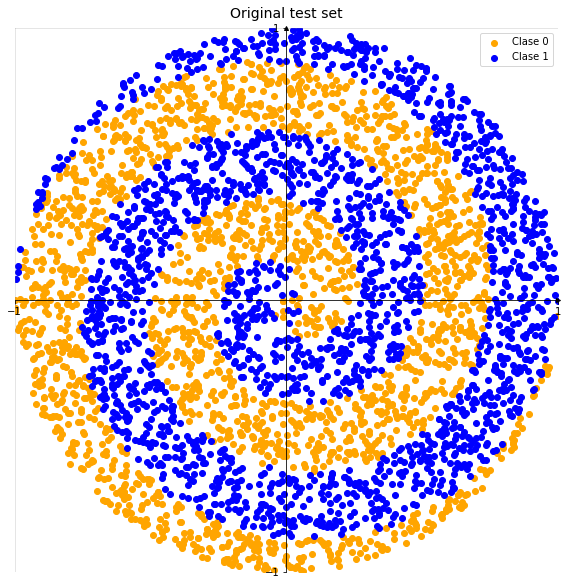

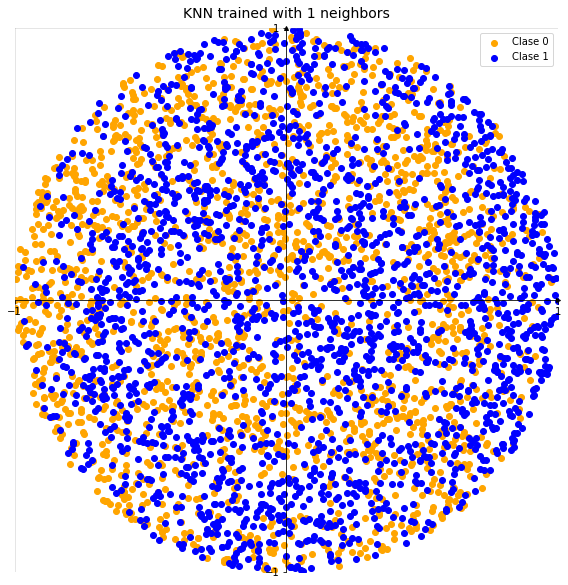

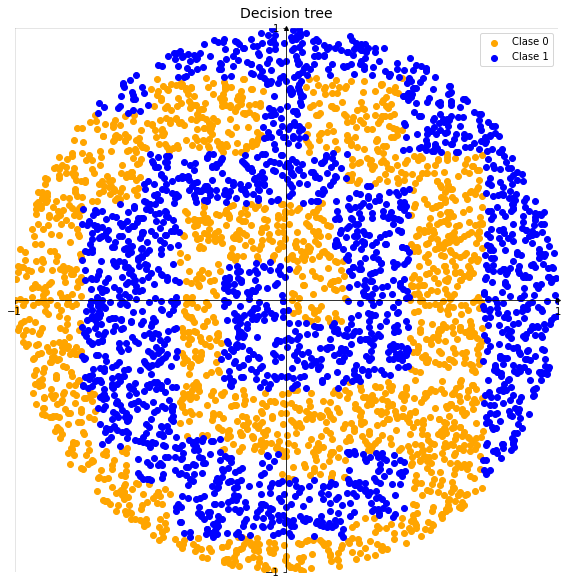

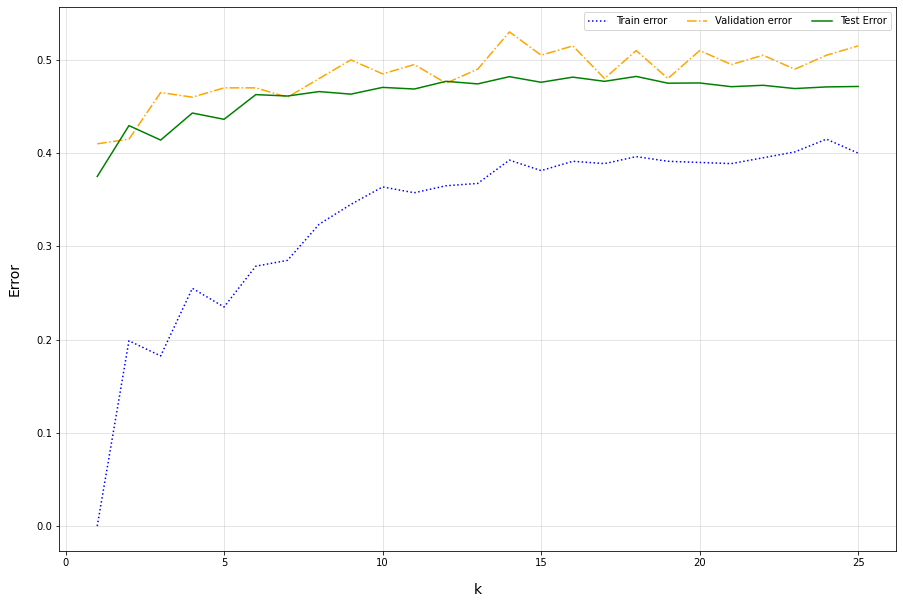

In [14]:
# Con ruido
col_names = [0, 1, 2, 3, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_spirals = pd.read_csv("datasets/espirales_con_ruido/c_2.data", header=None, names = col_names)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_spirals[x_col_names], df_data_spirals[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

# Leo el conjunto de test
df_test_spirals = pd.read_csv("datasets/espirales_con_ruido/c_2.test", header=None, names = col_names)
X_test, y_test = df_test_spirals[x_col_names], df_test_spirals[y_col_name]

k_values = range(1, 26)
best_knn, best_k, error_train, error_val, error_test = train_kneigh_classif(k_values, X_train, y_train, X_val, y_val, X_test, y_test)  

errors = []

for i in range(25):
  errors.append([error_train[i], i + 1, "Train error"])
  errors.append([error_val[i], i + 1, "Validation error"])
  errors.append([error_test[i], i + 1, "Test Error"])

knn_predict = best_knn.predict(X_test)

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

frame = {0 : X_test[0], 1 : X_test[1], 'Class' : knn_predict}
df_predict_knn = pd.DataFrame(frame, columns=[0, 1, 'Class'])
frame = {0 : X_test[0], 1 : X_test[1], 'Class' : clf_predict}
df_predict_clf = pd.DataFrame(frame, columns=[0, 1, 'Class'])

graph_df(df_test_spirals, title="Original test set")
graph_df(df_predict_knn, title=f"KNN trained with {best_k} neighbors")
graph_df(df_predict_clf, title="Decision tree")

errors_df = pd.DataFrame(errors, columns = ["Error", "k", "Class"])
graph_errors(errors_df, "k")

### Conclusiones

Los resultados son los esperados respecto a lo hablado en clases, para el problema
de las espirales (sin ruido) los resultados son bastantes buenos ya que entre
cada espiral la diferencia se encuentra bien definida y en el interior de cada una
sólo se encuentran puntos bien clasificados, sin ruido, por lo que al clasificar
un punto del conjunto de test si este se encuentra dentro de una espiral lejos de los bordes,
sus k-vecinos más cercanos (para k chicos) van a ser todos de la clase correcta. Solo se complica
un poco más cuando estamos cerca de los bordes entre ambas espirales o cerca del final
de una de ellas donde la franja se achica, por lo que los puntos en los bordes
"tienen menos vecinos" para poder clasificar.

Ya cuando estamos clasificando las espirales con ruidos nuestros resultados 
empeoran considerablemente, siendo casi una clasificación al azar, nuestro modelo
no tiene mucha resistencia al ruido. Para nuestro modelo las características
son fuertemente dependientes entre sí y al tener 2 características "verdaderas" con
datos útiles y 2 que son ruido, los datos útiles y los datos ruidosos tienen el mismo
peso a la hora de "votar" provocando que obtengamos los resultados mostrados.

La forma de mejorar nuestros resultados sería modificando el peso o importancia que tiene
cada columna a la hora de clasificar, pero esto lo podemos hacer sobre nuestros datos
solo porque ya tenemos este conocimiento previo sobre esto mismo, sobre otros
datos no sería tan fácil darse cuenta de esto.

En las gráficas de error no se observa sobreajuste para k mayores a 1 o 2. 

--------------------------------------------------------------------------------
## Ejercicio 2

In [12]:
errors = []

for d in [2 ** i for i in range(1, 6)]:
  x_col_names = list(range(d))
  y_col_name = 'Class'

  # Genero los conjuntos de test para cada d
  df_test_diag = generate_diagonal(d, 10000, 0.78)
  df_test_para = generate_parallel(d, 10000, 0.78)

  X_test_diag, y_test_diag = df_test_diag[x_col_names], df_test_diag[y_col_name]
  X_test_para, y_test_para = df_test_para[x_col_names], df_test_para[y_col_name]

  for k in [1, 3]:
    for i in range(20):
      # Genero los conjuntos de entrenamiento
      df_train_diag = generate_diagonal(d, 250, 0.78)
      df_train_para = generate_parallel(d, 250, 0.78)

      X_train_diag, y_train_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
      X_train_para, y_train_para = df_train_para[x_col_names], df_train_para[y_col_name]

      knn_diag = KNeighborsClassifier(n_neighbors=k)
      knn_para = KNeighborsClassifier(n_neighbors=k)

      knn_diag.fit(X_train_diag, y_train_diag)
      knn_para.fit(X_train_para, y_train_para)

      predict_train_diag = knn_diag.predict(X_train_diag)
      predict_test_diag = knn_diag.predict(X_test_diag)
      predict_train_para = knn_para.predict(X_train_para)
      predict_test_para = knn_para.predict(X_test_para)

      actual_error_train_diag = 1 - accuracy_score(y_train_diag, predict_train_diag)
      actual_error_test_diag = 1 - accuracy_score(y_test_diag, predict_test_diag)  
      actual_error_train_para = 1 - accuracy_score(y_train_para, predict_train_para)
      actual_error_test_para = 1 - accuracy_score(y_test_para, predict_test_para)

      errors.append([actual_error_train_diag, d, f"KNN, K = {k} - Train diagonal"])
      errors.append([actual_error_test_diag, d, f"KNN, K = {k} - Test diagonal"])
      errors.append([actual_error_train_para, d, f"KNN, K = {k} - Train parallel"])
      errors.append([actual_error_test_para, d, f"KNN, K = {k} - Test parallel"])

errors_knn_df = pd.DataFrame(errors, columns = ["Error", "d", "Class"])
errors_knn_df.to_csv("datasets/dimensions/knn_dimensions_errors.csv", index = False)

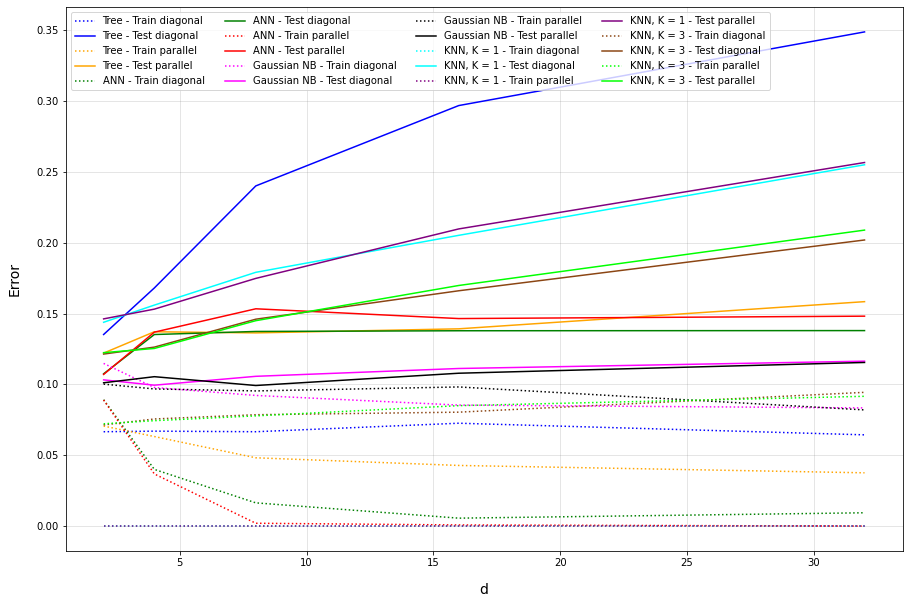

In [5]:
errors_tree_df = pd.read_csv("datasets/dimensions/tree_dimensions_errors.csv")
errors_ann_df = pd.read_csv("datasets/dimensions/ann_dimensions_errors.csv")
errors_bayes_df = pd.read_csv("datasets/dimensions/bayes_dimensions_errors.csv")
errors_knn_df = pd.read_csv("datasets/dimensions/knn_dimensions_errors.csv")
errors_df = pd.concat([errors_tree_df, errors_ann_df, errors_bayes_df, errors_knn_df])
graph_errors_dimensions(errors_df)

### Conclusiones
En el gráfico se puede ver que el modelo de k-vecinos no es el mejor para el problema
de dimensionalidad, siendo superiores redes neuronales y naive bayes, donde 
k-vecinos se ve más afectado al crecer la dimensionalidad, puedo creer que es debido
a que a medida que crece la dimensionalidad, para cada punto sus vecinos se van
a encontrar más lejos, más esparcidos en el espacio n-dimensional.

Sobre el modelo en sí, se puede decir que a la hora de clasificar no encuentra
diferencia entre los problemas "diagonal" y "paralelo" ya que ambos son el mismo
problema pero rotado, y al estar trabajando sobre distancias no le afecta el 
cambio de las posiciones en sí porque las distancias siguen siendo básicamente las mismas.

Para k = 3 el error es menor a k = 1, puedo pensar que es debido a que para k = 3
la resistencia al ruido es un mayor.

Para k = 1 encontramos un sobreajuste total ya que obtenemos una "función de puntos"
(si recuerdo el nombre correctamente) y para cada punto del conjunto de entrenamiento
obtenemos una predicción perfecta porque para un punto dado su punto más cercano es sí mismo.

--------------------------------------------------------------------------------
## Ejercicio 3

Mejor k para problema diagonal: 34 con error de validación 0.12079999999999991, error de paralelo: 0.13319999999999993
Mejor k para problema paralelo: 41 con error de validación 0.12159999999999993. error de diagonal: 0.12799999999999995
Mejor k para ambos promediando: 42 con error de validación 0.12360000000000002. error de diagonal: 0.12459999999999999, error de paralelo: 0.1226


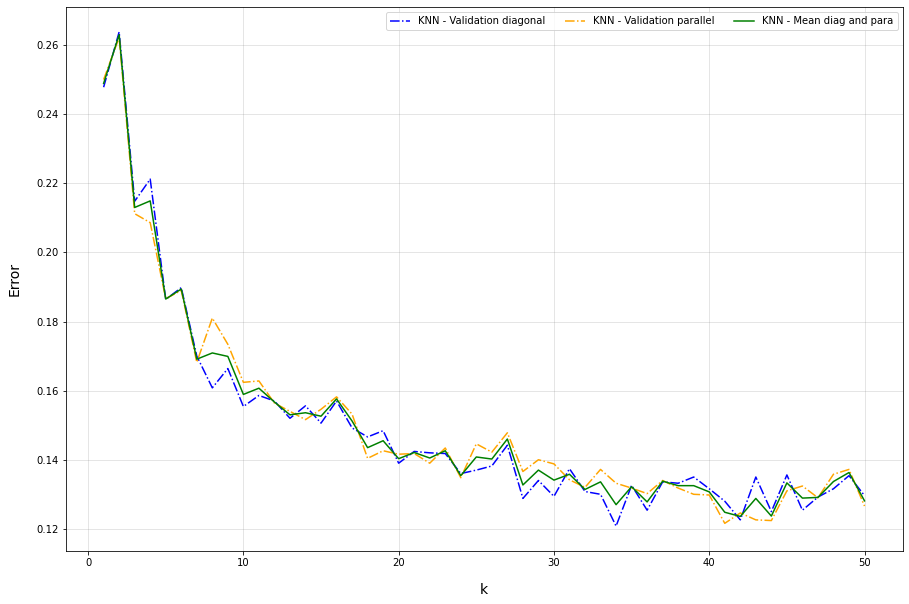

In [32]:
errors = []

d = 32
x_col_names = list(range(d))
y_col_name = 'Class'

best_val_error_diag = math.inf
best_val_error_para = math.inf
best_val_error_mean = math.inf

# Repito una cantidad de alta porque los resultados me variaban mucho cada
# vez que ejecutaba
repeats = 100

for k in range(1, 51):
  acum_diag = 0
  acum_para = 0
  acum_mean = 0

  for _ in range (repeats):
    # Genero los conjuntos de entrenamiento
    df_train_diag = generate_diagonal(d, 250, 0.78)
    df_train_para = generate_parallel(d, 250, 0.78)

    X_diag, y_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
    X_train_diag, X_val_diag, y_train_diag, y_val_diag = train_test_split(X_diag, y_diag, random_state=0, test_size=0.2)
    X_para, y_para = df_train_para[x_col_names], df_train_para[y_col_name]
    X_train_para, X_val_para, y_train_para, y_val_para = train_test_split(X_para, y_para, random_state=0, test_size=0.2)

    knn_diag = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_para = KNeighborsClassifier(n_neighbors=k, weights='distance')
  
    knn_diag.fit(X_train_diag, y_train_diag)
    knn_para.fit(X_train_para, y_train_para)
  
    predict_val_diag = knn_diag.predict(X_val_diag)
    predict_val_para = knn_para.predict(X_val_para)
  
    actual_error_val_diag = 1 - accuracy_score(y_val_diag, predict_val_diag)
    actual_error_val_para = 1 - accuracy_score(y_val_para, predict_val_para)
    actual_error_val_mean = (actual_error_val_diag + actual_error_val_para) / 2
  
    acum_diag += actual_error_val_diag
    acum_para += actual_error_val_para
    acum_mean += actual_error_val_mean

    errors.append([actual_error_val_diag, k, f"KNN - Validation diagonal"])
    errors.append([actual_error_val_para, k, f"KNN - Validation parallel"])
    errors.append([actual_error_val_mean, k, f"KNN - Mean diag and para"])
  
  acum_diag /= repeats
  acum_para /= repeats
  acum_mean /= repeats

  if acum_diag < best_val_error_diag:
    best_val_error_diag = acum_diag
    best_k_diag = k
    best_diag_error_para = acum_para
    
  if acum_para < best_val_error_para:
    best_val_error_para = acum_para
    best_k_para = k
    best_para_error_diag = acum_diag
  
  if acum_mean < best_val_error_mean:
    best_val_error_mean = acum_mean
    best_k_mean = k
    best_mean_error_diag = acum_para
    best_mean_error_para = acum_diag

errors_df = pd.DataFrame(errors, columns = ["Error", "k", "Class"])
graph_errors(errors_df, 'k')

print(f"Mejor k para problema diagonal: {best_k_diag} con error de validación {best_val_error_diag}, error de paralelo: {best_diag_error_para}")
print(f"Mejor k para problema paralelo: {best_k_para} con error de validación {best_val_error_para}. error de diagonal: {best_para_error_diag}")
print(f"Mejor k para ambos promediando: {best_k_mean} con error de validación {best_val_error_mean}. error de diagonal: {best_mean_error_diag}, error de paralelo: {best_mean_error_para}")

En este apartado busqué el mejor k para ambos problemas, diagonal y paralelo, además
de buscar el mejor promediando el error en la predicción de ambos problemas.
Elijo k = 42 para seguir ya que es el mejor k para el promedio de error de ambos problemas,
además de que el error promediado da cercano al mejor error obtenido para cada problema
individualmente.

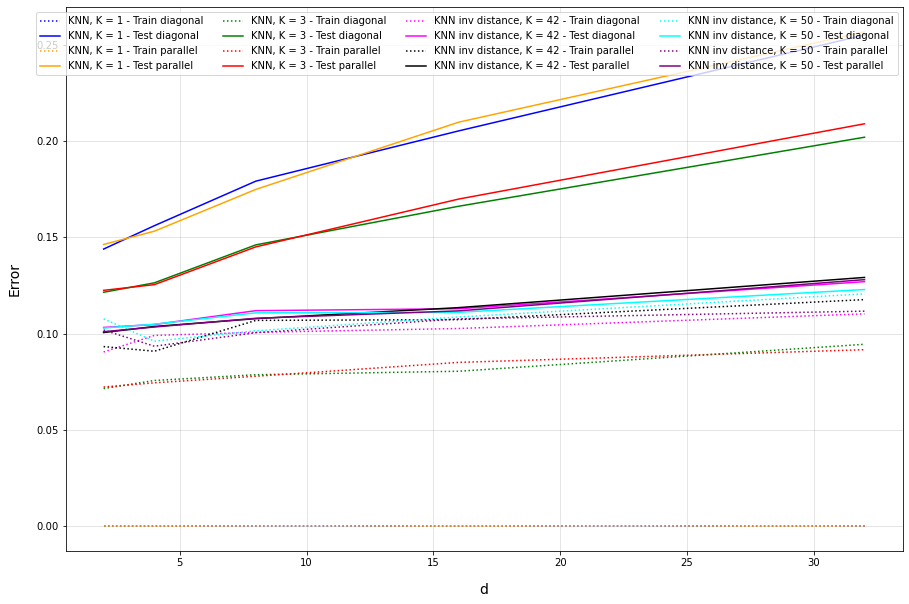

In [2]:
errors = []

for d in [2 ** i for i in range(1, 6)]:
  x_col_names = list(range(d))
  y_col_name = 'Class'

  # Genero los conjuntos de test para cada d
  df_test_diag = generate_diagonal(d, 10000, 0.78)
  df_test_para = generate_parallel(d, 10000, 0.78)

  X_test_diag, y_test_diag = df_test_diag[x_col_names], df_test_diag[y_col_name]
  X_test_para, y_test_para = df_test_para[x_col_names], df_test_para[y_col_name]

  for k in [42, 50]:
    for i in range(20):
      # Genero los conjuntos de entrenamiento
      df_train_diag = generate_diagonal(d, 250, 0.78)
      df_train_para = generate_parallel(d, 250, 0.78)

      X_train_diag, y_train_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
      X_train_para, y_train_para = df_train_para[x_col_names], df_train_para[y_col_name]

      knn_diag = KNeighborsClassifier(n_neighbors=k)
      knn_para = KNeighborsClassifier(n_neighbors=k)

      knn_diag.fit(X_train_diag, y_train_diag)
      knn_para.fit(X_train_para, y_train_para)

      predict_train_diag = knn_diag.predict(X_train_diag)
      predict_test_diag = knn_diag.predict(X_test_diag)
      predict_train_para = knn_para.predict(X_train_para)
      predict_test_para = knn_para.predict(X_test_para)

      actual_error_train_diag = 1 - accuracy_score(y_train_diag, predict_train_diag)
      actual_error_test_diag = 1 - accuracy_score(y_test_diag, predict_test_diag)  
      actual_error_train_para = 1 - accuracy_score(y_train_para, predict_train_para)
      actual_error_test_para = 1 - accuracy_score(y_test_para, predict_test_para)

      errors.append([actual_error_train_diag, d, f"KNN inv distance, K = {k} - Train diagonal"])
      errors.append([actual_error_test_diag, d, f"KNN inv distance, K = {k} - Test diagonal"])
      errors.append([actual_error_train_para, d, f"KNN inv distance, K = {k} - Train parallel"])
      errors.append([actual_error_test_para, d, f"KNN inv distance, K = {k} - Test parallel"])

errors_distance_df = pd.DataFrame(errors, columns = ["Error", "d", "Class"])
errors_uniform_df = pd.read_csv("datasets/dimensions/knn_dimensions_errors.csv")
errors_df = pd.concat([errors_uniform_df, errors_distance_df])
graph_errors_dimensions(errors_df)

### Conclusiones
Al aplicar la versión con votación pesada por distancia pesada el resultado
mejora considerablemente, siendo mejor a lo obtenido con redes neuronales y estando muy cerca, apenas por encima de naives bayes y el clasificador óptimo.

Esto se podría deber a que al estar utilizado esta votación, el clasificador
se encuentra menos afectado por la reducción de la densidad de puntos que se encuentran
en nuestro espacio al aumentar la dimensionalidad, ya que al aumentar la dimensionalidad
es más probable que dentro de los k-vecinos más cercanos se encuentren en realidad
puntos que son lejanos ya que estos se encuentran más esparcidos entre sí, por lo que ahora es más
importante que los puntos más cercanos tengan mayor peso respecto a los demás.

--------------------------------------------------------------------------------
## Ejercicio 4

,Model,Train error,Test error
0,"KNN Uniform, K = 13",0.012794,0.010961
1,"KNN Inv Distance, K = 13",0.000000,0.010525
2,ANN,0.004912,0.005311


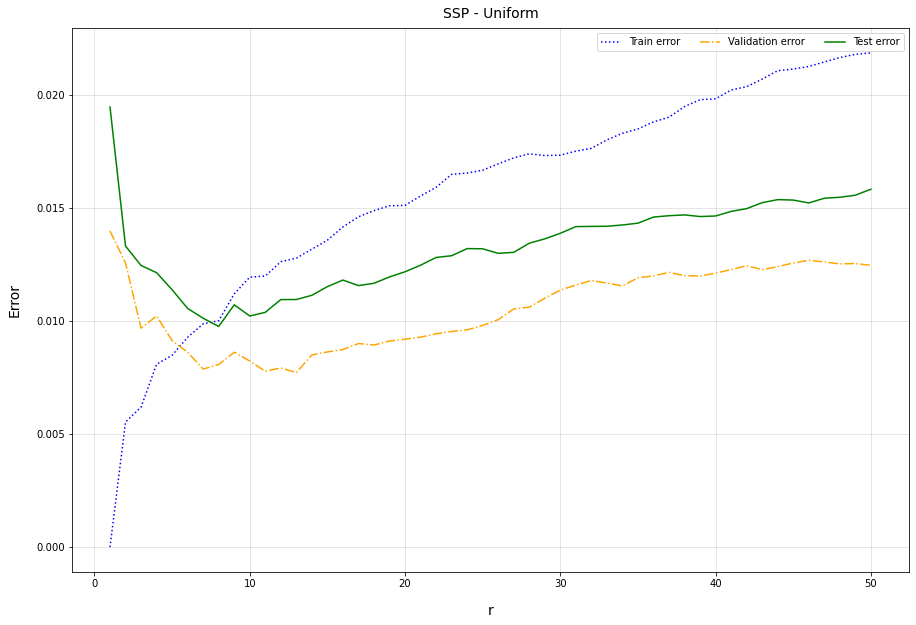

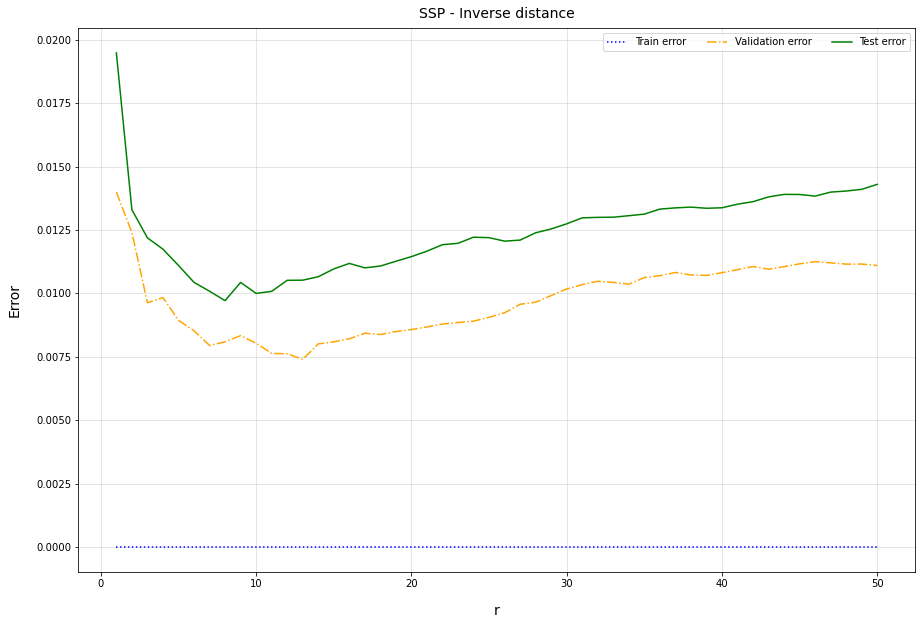

In [7]:
col_names=list(range(12)) + ['Value']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_ssp = pd.read_csv("datasets/ssp/ssp.data", header=None, names = col_names)
X, y = df_data_ssp[x_col_names], df_data_ssp[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)
# Leo el conjunto de test
df_test_ssp = pd.read_csv("datasets/ssp/ssp.test", header=None, names = col_names)
X_test, y_test = df_test_ssp[x_col_names], df_test_ssp[y_col_name]

k_values = range(1,51)

best_knn_unif, best_k_unif, e_train_unif, e_val_unif, e_test_unif = train_kneigh_regress(k_values, X_train, y_train, X_val, y_val, X_test, y_test)
best_knn_inv, best_k_inv, e_train_inv, e_val_inv, e_test_inv = train_kneigh_regress(k_values, X_train, y_train, X_val, y_val, X_test, y_test, 'distance')

errors = []
for i in range(len(k_values)):
  errors.append([e_train_unif[i], k_values[i], "Train error"])
  errors.append([e_val_unif[i], k_values[i], "Validation error"])
  errors.append([e_test_unif[i], k_values[i], "Test error"])

errors_df = pd.DataFrame(errors, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="SSP - Uniform")

errors = []
for i in range(len(k_values)):
  errors.append([e_train_inv[i], k_values[i], "Train error"])
  errors.append([e_val_inv[i], k_values[i], "Validation error"])
  errors.append([e_test_inv[i], k_values[i], "Test error"])

errors_df = pd.DataFrame(errors, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="SSP - Inverse distance")

table = []
table.append([f"KNN Uniform, K = {best_k_unif}", e_train_unif[best_k_unif - 1], e_test_unif[best_k_unif - 1]])
table.append([f"KNN Inv Distance, K = {best_k_inv}", e_train_inv[best_k_inv - 1], e_test_inv[best_k_inv - 1]])
table.append(["ANN", 0.004912, 0.005311])

pd.DataFrame(table, columns = ["Model", "Train error", "Test error"])

,Model,Train error,Test error
0,"KNN Uniform, K = 4",0.123792,0.150020
1,"KNN Inv Distance, K = 4",0.000000,0.105549
2,ANN,0.045407,0.082305


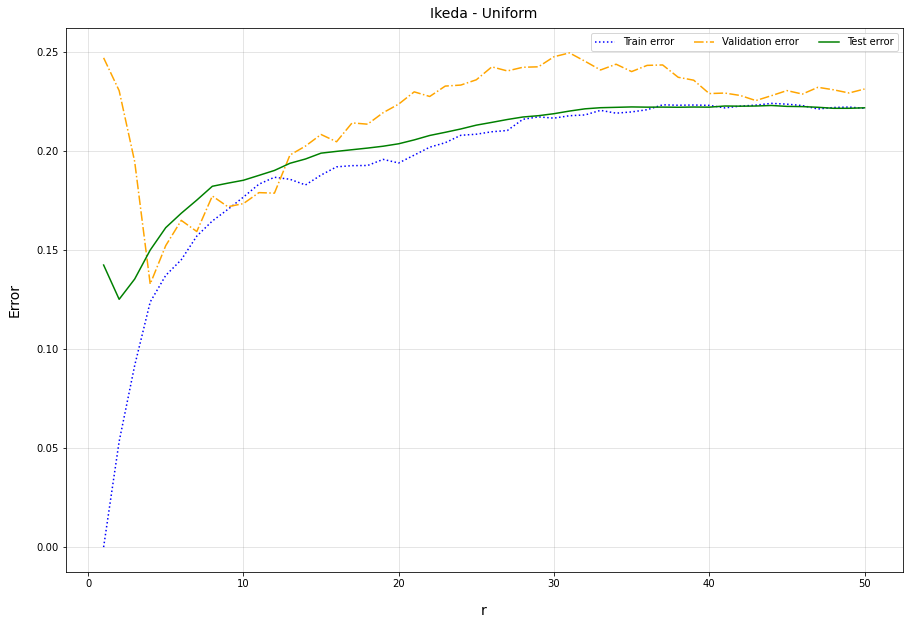

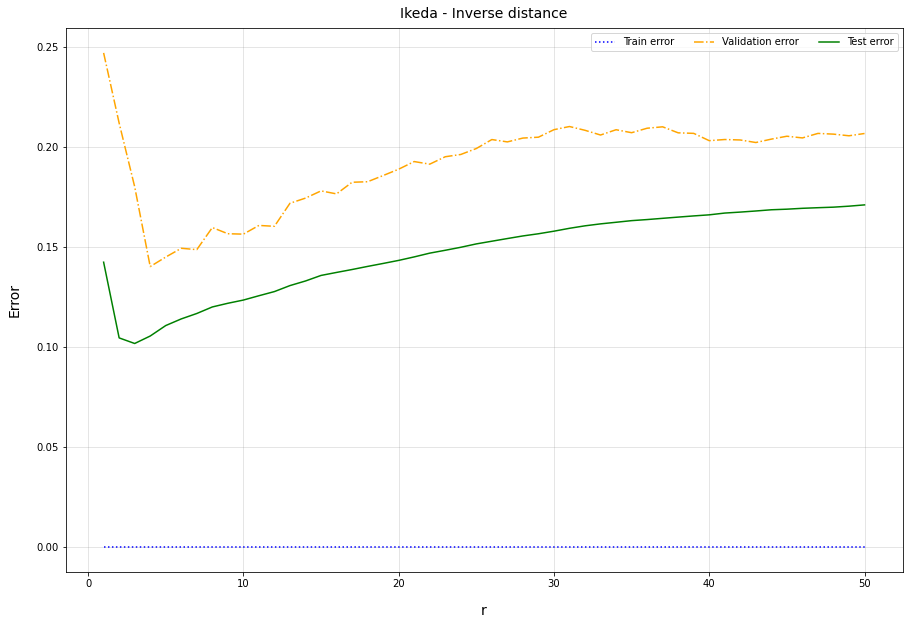

In [4]:
col_names = list(range(5)) + ['Value']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y validar
df_data_ikeda = pd.read_csv("datasets/ikeda/ikeda.data", header=None, names = col_names, delim_whitespace=True, skipinitialspace=True)
# Separo al azar para conjunto de validación
X, y = df_data_ikeda[x_col_names], df_data_ikeda[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)
# Leo el conjunto de test
df_test_ikeda = pd.read_csv("datasets/ikeda/ikeda.test", header=None, names = col_names, delim_whitespace=True, skipinitialspace=True)
X_test, y_test = df_test_ikeda[x_col_names], df_test_ikeda[y_col_name]

k_values = range(1,51)

best_knn_unif, best_k_unif, e_train_unif, e_val_unif, e_test_unif = train_kneigh_regress(k_values, X_train, y_train, X_val, y_val, X_test, y_test)
best_knn_inv, best_k_inv, e_train_inv, e_val_inv, e_test_inv = train_kneigh_regress(k_values, X_train, y_train, X_val, y_val, X_test, y_test, 'distance')

errors = []
for i in range(len(k_values)):
  errors.append([e_train_unif[i], k_values[i], "Train error"])
  errors.append([e_val_unif[i], k_values[i], "Validation error"])
  errors.append([e_test_unif[i], k_values[i], "Test error"])

errors_df = pd.DataFrame(errors, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="Ikeda - Uniform")

errors = []
for i in range(len(k_values)):
  errors.append([e_train_inv[i], k_values[i], "Train error"])
  errors.append([e_val_inv[i], k_values[i], "Validation error"])
  errors.append([e_test_inv[i], k_values[i], "Test error"])

errors_df = pd.DataFrame(errors, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="Ikeda - Inverse distance")

table = []
table.append([f"KNN Uniform, K = {best_k_unif}", e_train_unif[best_k_unif - 1], e_test_unif[best_k_unif - 1]])
table.append([f"KNN Inv Distance, K = {best_k_inv}", e_train_inv[best_k_inv - 1], e_test_inv[best_k_inv - 1]])
table.append(["ANN", 0.045407, 0.082305])

pd.DataFrame(table, columns = ["Model", "Train error", "Test error"])

### Conclusiones
Para ambos problemas, redes neuronales resulta ser superior, especialmente en
SSP.

Para KNN con pesos uniformes no se observa sobreajuste para k mayores a 7 aproxidamente, pero sí para distancia
inversa donde el error de entrenamiento para ambos problemas es directamente 0 para todo k.

--------------------------------------------------------------------------------
## Ejercicio 5

In [ ]:
errors = []

d = 32
x_col_names = list(range(d))
y_col_name = 'Class'

df_test_diag = generate_diagonal(d, 10000, 0.78)
df_test_para = generate_parallel(d, 10000, 0.78)

X_test_diag, y_test_diag = df_test_diag[x_col_names], df_test_diag[y_col_name]
X_test_para, y_test_para = df_test_para[x_col_names], df_test_para[y_col_name]

best_val_error_diag = math.inf
best_val_error_para = math.inf
best_val_error_mean = math.inf

errors_diag = []
errors_para = []

r_diag = []
r_para = []

r_values = np.arange(40, 42, 0.001)
for _ in range(20):
  # Genero los conjuntos de entrenamiento
  df_train_diag = generate_diagonal(d, 250, 0.78)
  df_train_para = generate_parallel(d, 250, 0.78)

  X_diag, y_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
  X_train_diag, X_val_diag, y_train_diag, y_val_diag = train_test_split(X_diag, y_diag, random_state=0, test_size=0.2)
  X_para, y_para = df_train_para[x_col_names], df_train_para[y_col_name]
  X_train_para, X_val_para, y_train_para, y_val_para = train_test_split(X_para, y_para, random_state=0, test_size=0.2)

  best_knn_diag, best_r_diag, e_train_diag, e_val_diag, e_test_diag = train_radiusneigh_classif(r_values, X_train_diag, y_train_diag, X_val_diag, y_val_diag, X_test_diag, y_test_diag)
  best_knn_para, best_r_para, e_train_para, e_val_para, e_test_para = train_radiusneigh_classif(r_values, X_train_para, y_train_para, X_val_para, y_val_para, X_test_para, y_test_para)

  r_diag.append(best_r_diag)
  r_para.append(best_r_para)

  for i in range(len(r_values)):
    errors_diag.append([e_train_diag[i], r_values[i], "Train error"])
    errors_diag.append([e_val_diag[i], r_values[i], "Validation error"])
    errors_diag.append([e_test_diag[i], r_values[i], "Test error"])

  for i in range(len(r_values)):
    errors_para.append([e_train_para[i], r_values[i], "Train error"])
    errors_para.append([e_val_para[i], r_values[i], "Validation error"])
    errors_para.append([e_test_para[i], r_values[i], "Test error"])

print(f"Mejor r en promedio para problema diagonal: {np.mean(r_diag)}")
print(f"Mejor r en promedio para problema paralelo: {np.mean(r_para)}")

errors_df = pd.DataFrame(errors_diag, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="Diagonal")

errors_df = pd.DataFrame(errors_para, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="Parallel")

Este ejercicio no pude terminarlo, no encontraba valores de r que funcionaron consistentemente, cada vez que iteraba sobre un rango de posibles valores, fallaba por algún motivo con valores de r más altos al mínimo dado y después de muchas iteraciones.

--------------------------------------------------------------------------------
## Ejercicio 6

Votación con pesos uniformes:
Mejor radio: 0.64, con error de entrenamiento: 0.015107497943096064, error de validación: 0.00963683731551342 y error de test: 0.016196003093348
Votación por distancia inversa:
Mejor radio: 0.65, con error de entrenamiento: 0.0, error de validación: 0.008832293990359688 y error de test: 0.015098809492175074


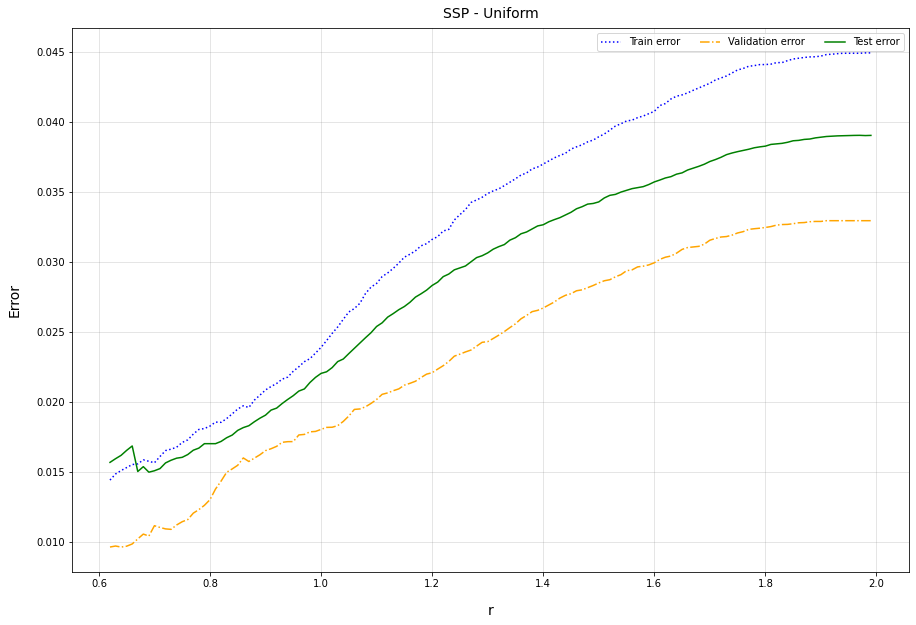

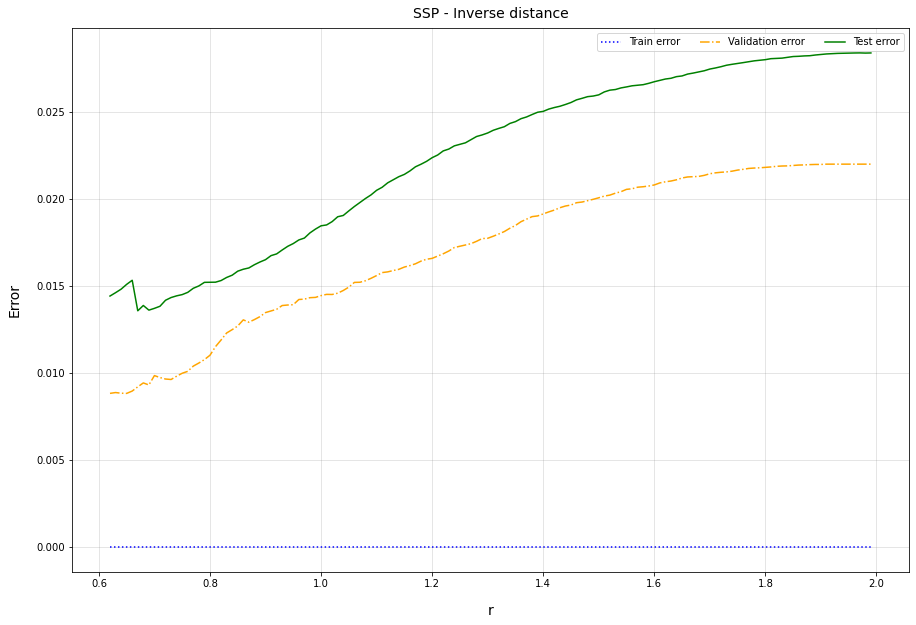

In [2]:
col_names=list(range(12)) + ['Value']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_ssp = pd.read_csv("datasets/ssp/ssp.data", header=None, names = col_names)
X, y = df_data_ssp[x_col_names], df_data_ssp[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)
# Leo el conjunto de test
df_test_ssp = pd.read_csv("datasets/ssp/ssp.test", header=None, names = col_names)
X_test, y_test = df_test_ssp[x_col_names], df_test_ssp[y_col_name]

r_values = np.arange(0.62, 2, 0.01)

best_knn, best_r, error_train, error_val, error_test = train_radiusneigh_regress(r_values, X_train, y_train, X_val, y_val, X_test, y_test)

errors = []
for i in range(len(r_values)):
  errors.append([error_train[i], r_values[i], "Train error"])
  errors.append([error_val[i], r_values[i], "Validation error"])
  errors.append([error_test[i], r_values[i], "Test error"])

  if r_values[i] == best_r:
    best_error_train = error_train[i]
    best_error_val = error_val[i]
    best_error_test = error_test[i]

errors_df = pd.DataFrame(errors, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="SSP - Uniform")

print("Votación con pesos uniformes:")
print(f"Mejor radio: {best_r}, con error de entrenamiento: {best_error_train}, error de validación: {best_error_val} y error de test: {best_error_test}")

best_knn, best_r, error_train, error_val, error_test = train_radiusneigh_regress(r_values, X_train, y_train, X_val, y_val, X_test, y_test, method='distance')

errors = []
for i in range(len(r_values)):
  errors.append([error_train[i], r_values[i], "Train error"])
  errors.append([error_val[i], r_values[i], "Validation error"])
  errors.append([error_test[i], r_values[i], "Test error"])

  if r_values[i] == best_r:
    best_error_train = error_train[i]
    best_error_val = error_val[i]
    best_error_test = error_test[i]

errors_df = pd.DataFrame(errors, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="SSP - Inverse distance")

print("Votación por distancia inversa:")
print(f"Mejor radio: {best_r}, con error de entrenamiento: {best_error_train}, error de validación: {best_error_val} y error de test: {best_error_test}")

Votación con pesos uniformes:
Mejor radio: 0.9400000000000002, con error de entrenamiento: 0.17293019594808273, error de validación: 0.16671230289084973 y error de test: 0.1855542483057136
Votación por distancia inversa:
Mejor radio: 0.9700000000000002, con error de entrenamiento: 0.0, error de validación: 0.15553584941036955 y error de test: 0.12689862001063862


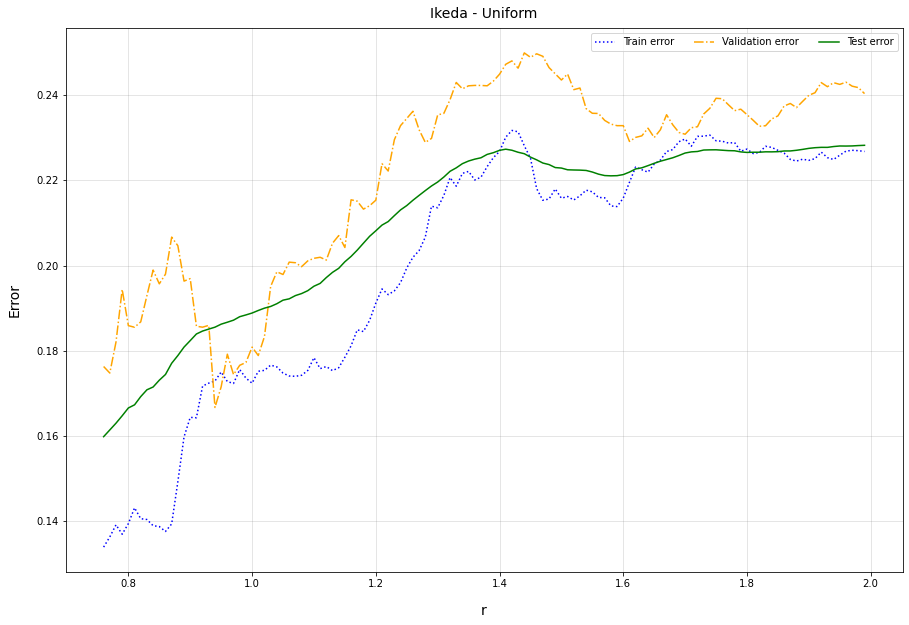

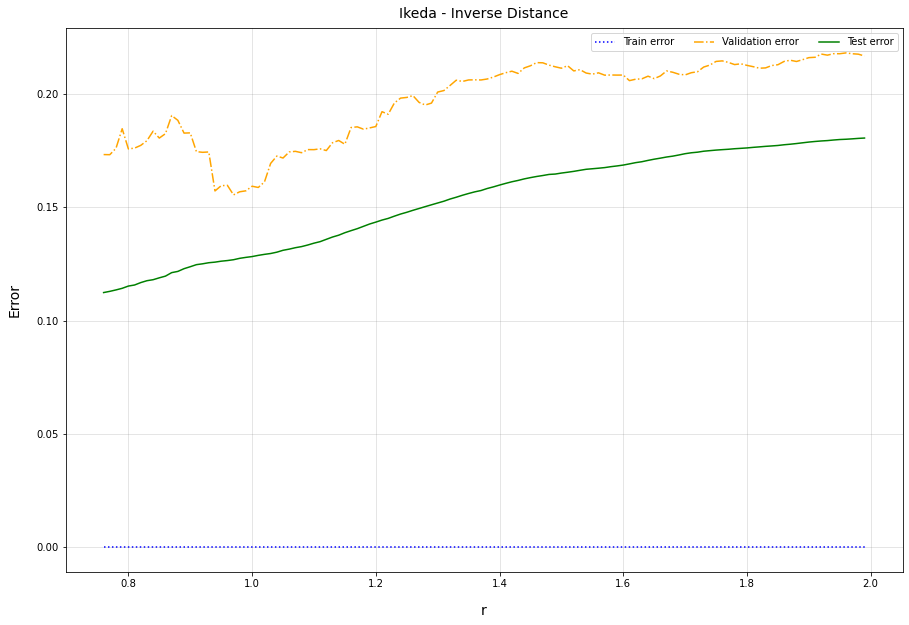

In [3]:
col_names = list(range(5)) + ['Value']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y validar
df_data_ikeda = pd.read_csv("datasets/ikeda/ikeda.data", header=None, names = col_names, delim_whitespace=True, skipinitialspace=True)
# Separo al azar para conjunto de validación
X, y = df_data_ikeda[x_col_names], df_data_ikeda[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)
# Leo el conjunto de test
df_test_ikeda = pd.read_csv("datasets/ikeda/ikeda.test", header=None, names = col_names, delim_whitespace=True, skipinitialspace=True)
X_test, y_test = df_test_ikeda[x_col_names], df_test_ikeda[y_col_name]
best_error_val = math.inf

r_values = np.arange(0.76, 2, 0.01)

best_knn, best_r, error_train, error_val, error_test = train_radiusneigh_regress(r_values, X_train, y_train, X_val, y_val, X_test, y_test)

errors = []
for i in range(len(r_values)):
  errors.append([error_train[i], r_values[i], "Train error"])
  errors.append([error_val[i], r_values[i], "Validation error"])
  errors.append([error_test[i], r_values[i], "Test error"])

  if r_values[i] == best_r:
    best_error_train = error_train[i]
    best_error_val = error_val[i]
    best_error_test = error_test[i]

errors_df = pd.DataFrame(errors, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="Ikeda - Uniform")

print("Votación con pesos uniformes:")
print(f"Mejor radio: {best_r}, con error de entrenamiento: {best_error_train}, error de validación: {best_error_val} y error de test: {best_error_test}")

best_knn, best_r, error_train, error_val, error_test = train_radiusneigh_regress(r_values, X_train, y_train, X_val, y_val, X_test, y_test, method='distance')

errors = []
for i in range(len(r_values)):
  errors.append([error_train[i], r_values[i], "Train error"])
  errors.append([error_val[i], r_values[i], "Validation error"])
  errors.append([error_test[i], r_values[i], "Test error"])

  if r_values[i] == best_r:
    best_error_train = error_train[i]
    best_error_val = error_val[i]
    best_error_test = error_test[i]

errors_df = pd.DataFrame(errors, columns = ["Error", "r", "Class"])
graph_errors(errors_df, 'r', title="Ikeda - Inverse Distance")

print("Votación por distancia inversa:")
print(f"Mejor radio: {best_r}, con error de entrenamiento: {best_error_train}, error de validación: {best_error_val} y error de test: {best_error_test}")

### Conclusiones

Para ambos problemas, los resultados obtenidos con votación por distancia inversa son superiores a los obtenidos con votación con pesos uniformes y algo a notar es que también en ambos el error de entrenamiento en la votación por distancia inversa vuelve a ser igual a 0. En estos problemas, la variante de votación con vecinos dentro de un radio fue inferior a la de los k-vecinos.

Los resultados siguen siendo inferiores a los obtenidos con redes neuronales.

Para obtener el r óptimo, lo que hice fue buscar el menor r permitido, ya que
para r muy chicos si para un punto no se encontraban vecinos el algoritmo tiraba
un error, y a partir de este r mínimo voy aumentándolo gradualmente hasta r+1 o r+2
normalmente, al parecer para estos problemas se obtienen mejores resultados
con un radio lo menor posible o cerca del mínimo posible.